<a href="https://colab.research.google.com/github/alireza06/JSAC_waveform_design/blob/main/GA%2Cofdma_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generation 1: Best fitness = 2.4497353756698863
Generation 2: Best fitness = 2.3758869009725996
Generation 3: Best fitness = 2.226650330458957
Generation 4: Best fitness = 2.1650272928106347
Generation 5: Best fitness = 2.1650272928106347
Generation 6: Best fitness = 2.044539028142656
Generation 7: Best fitness = 2.0254995105991473
Generation 8: Best fitness = 1.9759392071407627
Generation 9: Best fitness = 1.9522897728026656
Generation 10: Best fitness = 1.945999680644956
Generation 11: Best fitness = 1.945591101513297
Generation 12: Best fitness = 1.9245621086429046
Generation 13: Best fitness = 1.9020187072270311
Generation 14: Best fitness = 1.8939004356835711
Generation 15: Best fitness = 1.8619788877211623
Generation 16: Best fitness = 1.8619788877211623
Generation 17: Best fitness = 1.8619788877211623
Generation 18: Best fitness = 1.853750034435143
Generation 19: Best fitness = 1.853750034435143
Generation 20: Best fitness = 1.853750034435143
Generation 21: Best fitness = 1.8377

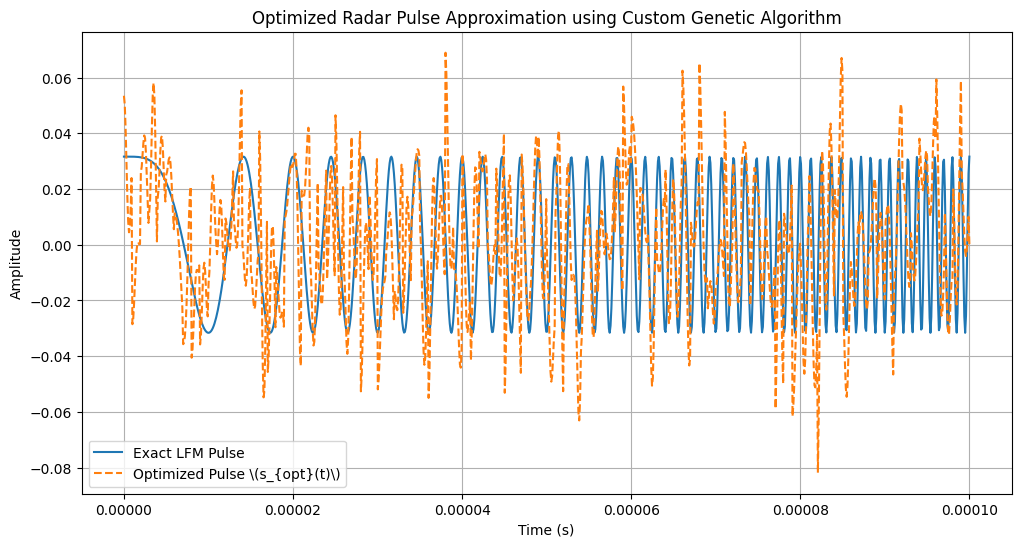

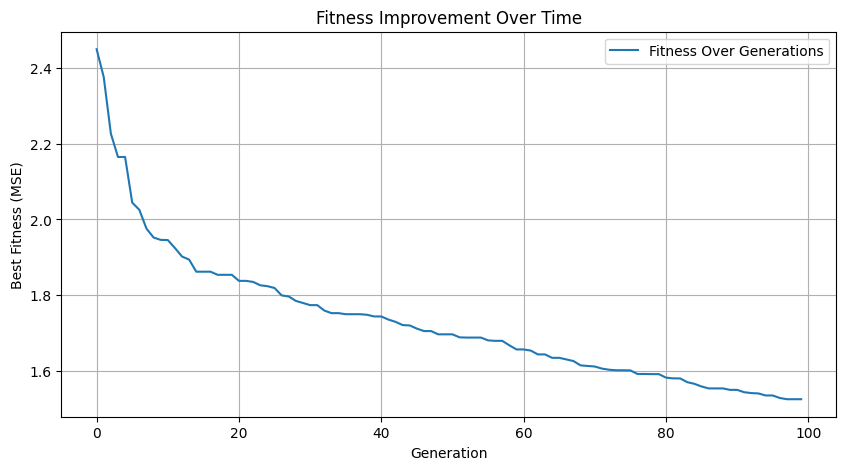

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
T = 1e-4       # Total duration of radar pulse (1e-4 seconds)
B = 1e6        # Bandwidth of radar pulse (1 MHz)
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies linearly spaced in bandwidth B

# High-resolution time vector for plotting
t = np.linspace(0, T, 1000)

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    return np.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    return np.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) * ((t >= l * Tb) & (t < (l + 1) * Tb))

# Construct the approximated radar pulse s_opt(t)
def construct_s_opt(c_opt, t):
    s_opt = np.zeros(len(t), dtype=complex)
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Normalize a signal to have unit energy
def normalize_signal(signal):
    norm = np.sqrt(np.sum(np.abs(signal)**2))
    return signal / norm

# Fitness function to minimize
def calculate_w(c_opt, t):
    s_approx = construct_s_opt(c_opt, t)
    mse = np.mean(np.abs(lfm_pulse(t) - s_approx)**2)
    return mse

# Genetic Algorithm Implementation
def genetic_algorithm(pop_size=50, generations=100, mutation_rate=0.1, elitism_rate=0.1):
    num_genes = K * L
    # Initialize population
    population = np.random.uniform(low=-1.0, high=1.0, size=(pop_size, num_genes))
    best_fitness_history = []

    for generation in range(generations):
        fitness = np.array([calculate_w(individual, t) for individual in population])
        best_fitness = np.min(fitness)
        best_fitness_history.append(best_fitness)
        print(f"Generation {generation+1}: Best fitness = {best_fitness}")

        # Selection (Tournament Selection)
        def tournament_selection():
            tournament_size = 3
            selected_indices = np.random.choice(pop_size, tournament_size)
            selected_fitness = fitness[selected_indices]
            return population[selected_indices[np.argmin(selected_fitness)]]

        # Create new population
        new_population = []
        num_elites = int(elitism_rate * pop_size)
        elites = population[np.argsort(fitness)[:num_elites]]

        while len(new_population) < pop_size - num_elites:
            # Parents selection
            parent1 = tournament_selection()
            parent2 = tournament_selection()

            # Crossover (Single-point)
            crossover_point = np.random.randint(1, num_genes)
            child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))

            # Mutation
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(num_genes)
                child[mutation_index] += np.random.normal()

            new_population.append(child)

        # Add elites to new population
        new_population.extend(elites)
        population = np.array(new_population)

    # Get the best solution from the final generation
    best_solution = population[np.argmin([calculate_w(ind, t) for ind in population])]
    return best_solution, best_fitness_history

# Run the Genetic Algorithm
best_c_opt, fitness_history = genetic_algorithm()

# Construct the approximated radar pulse s_opt(t)
s_opt = construct_s_opt(best_c_opt, t)

# Normalize both signals to ensure energy matching
lfm_normalized = normalize_signal(lfm_pulse(t))
s_opt_normalized = normalize_signal(s_opt)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, np.real(lfm_normalized), label="Exact LFM Pulse")
plt.plot(t, np.real(s_opt_normalized), linestyle='--', label="Optimized Pulse \(s_{opt}(t)\)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Optimized Radar Pulse Approximation using Custom Genetic Algorithm")
plt.legend()
plt.grid(True)
plt.show()

# Plot fitness history
plt.figure(figsize=(10, 5))
plt.plot(fitness_history, label='Fitness Over Generations')
plt.xlabel("Generation")
plt.ylabel("Best Fitness (MSE)")
plt.title("Fitness Improvement Over Time")
plt.grid(True)
plt.legend()
plt.show()


Generation 1: Best fitness = 0.000145003943176088
Generation 2: Best fitness = 0.000145003943176088
Generation 3: Best fitness = 6.346890596314239e-05
Generation 4: Best fitness = 6.346890596314239e-05
Generation 5: Best fitness = 6.346890596314239e-05
Generation 6: Best fitness = 6.346890596314239e-05
Generation 7: Best fitness = 6.346890596314239e-05
Generation 8: Best fitness = 6.346890596314239e-05
Generation 9: Best fitness = 6.346890596314239e-05
Generation 10: Best fitness = 6.346890596314239e-05
Generation 11: Best fitness = 6.346890596314239e-05
Generation 12: Best fitness = 6.346890596314239e-05
Generation 13: Best fitness = 6.346890596314239e-05
Generation 14: Best fitness = 5.571736538388911e-05
Generation 15: Best fitness = 5.571736538388911e-05
Generation 16: Best fitness = 3.360648122607208e-05
Generation 17: Best fitness = 3.360648122607208e-05
Generation 18: Best fitness = 6.797411807190739e-06
Generation 19: Best fitness = 6.797411807190739e-06
Generation 20: Best fit

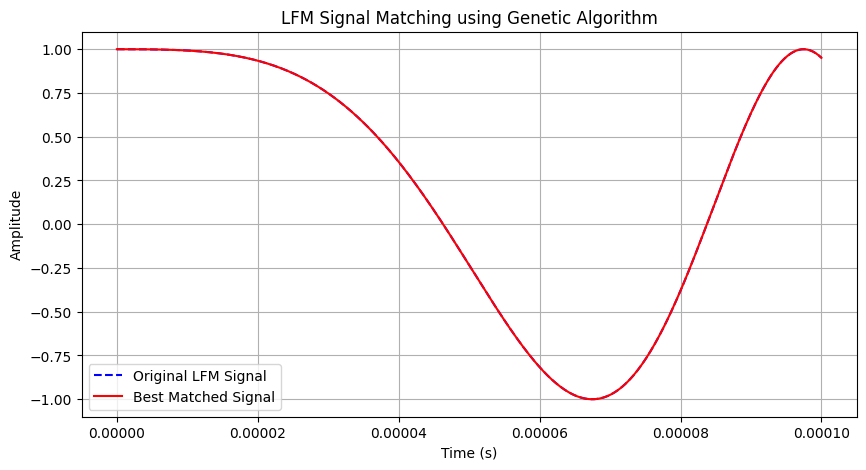

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp
import random

# Signal parameters (replace these with your LFM parameters if needed)
t = np.linspace(0, 1e-4, 500)  # Time vector
original_signal = chirp(t, f0=1000, f1=20000, t1=1e-4, method='linear')

# GA parameters
population_size = 100  # Larger population for better diversity
generations = 200  # More generations for better convergence
mutation_rate = 0.1  # Start mutation rate
mutation_decay = 0.995  # Reduce mutation rate gradually
elitism_rate = 0.1  # Percentage of top individuals to carry over
crossover_rate = 0.7

# Fitness function
def fitness(individual):
    # Generate the LFM signal based on the individual's parameters
    generated_signal = chirp(t, f0=individual[0], f1=individual[1], t1=1e-4, method='linear')
    # Calculate Mean Squared Error
    return np.mean((original_signal - generated_signal) ** 2)

# Generate initial population
def generate_individual():
    return [random.uniform(500, 3000), random.uniform(5000, 30000)]  # Initial random range for f0 and f1

def generate_population(size):
    return [generate_individual() for _ in range(size)]

# Tournament selection
def select_parent(population, fitness_scores):
    tournament_size = 5
    candidates = random.sample(range(len(population)), tournament_size)
    best = min(candidates, key=lambda idx: fitness_scores[idx])
    return population[best]

# Crossover function
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        crossover_point = random.randint(0, len(parent1) - 1)
        return parent1[:crossover_point] + parent2[crossover_point:]
    return parent1 if random.random() > 0.5 else parent2

# Mutation function
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        individual[0] += random.uniform(-100, 100)  # Mutate f0
        individual[1] += random.uniform(-1000, 1000)  # Mutate f1
    return individual

# Main GA loop
population = generate_population(population_size)
best_fit_over_time = []

for gen in range(generations):
    fitness_scores = [fitness(ind) for ind in population]
    best_fit = min(fitness_scores)
    best_fit_over_time.append(best_fit)
    print(f"Generation {gen + 1}: Best fitness = {best_fit}")

    # Sort population by fitness (ascending) and select elites
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population))]
    next_population = sorted_population[:int(elitism_rate * population_size)]

    # Generate new population through crossover and mutation
    while len(next_population) < population_size:
        parent1 = select_parent(sorted_population, fitness_scores)
        parent2 = select_parent(sorted_population, fitness_scores)
        offspring = crossover(parent1, parent2)
        offspring = mutate(offspring, mutation_rate)
        next_population.append(offspring)

    population = next_population
    mutation_rate *= mutation_decay  # Gradually reduce mutation rate

# Final evaluation
best_individual = min(population, key=lambda ind: fitness(ind))
best_f0, best_f1 = best_individual

# Generate final matched LFM signal
best_matched_signal = chirp(t, f0=best_f0, f1=best_f1, t1=1e-4, method='linear')

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(t, original_signal, 'b--', label='Original LFM Signal')
plt.plot(t, best_matched_signal, 'r-', label='Best Matched Signal')
plt.title('LFM Signal Matching using Genetic Algorithm')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


Generation 1/30: Best fitness = 2.350076
Generation 2/30: Best fitness = 1.683502
Generation 3/30: Best fitness = 1.336659
Generation 4/30: Best fitness = 1.269572
Generation 5/30: Best fitness = 1.231131
Generation 6/30: Best fitness = 1.231131
Generation 7/30: Best fitness = 1.231131
Generation 8/30: Best fitness = 1.230031
Generation 9/30: Best fitness = 1.230031
Generation 10/30: Best fitness = 1.230031
Generation 11/30: Best fitness = 1.230031
Generation 12/30: Best fitness = 1.230031
Generation 13/30: Best fitness = 1.230031
Generation 14/30: Best fitness = 1.230031
Generation 15/30: Best fitness = 1.230031
Generation 16/30: Best fitness = 1.230031
Generation 17/30: Best fitness = 1.230031
Generation 18/30: Best fitness = 1.230031
Generation 19/30: Best fitness = 1.230031
Generation 20/30: Best fitness = 1.230031
Generation 21/30: Best fitness = 1.230031
Generation 22/30: Best fitness = 1.230031
Generation 23/30: Best fitness = 1.230031
Generation 24/30: Best fitness = 1.230031
G

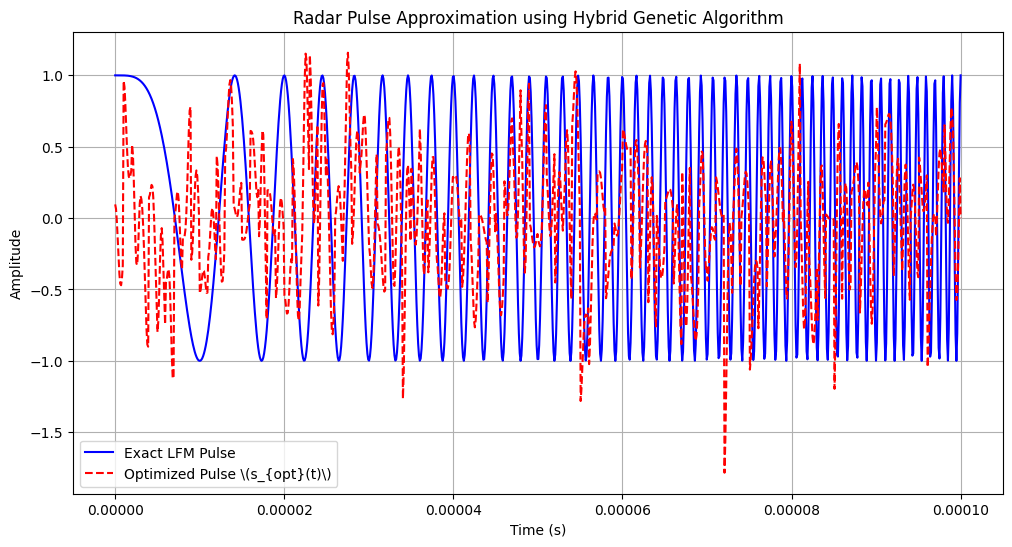

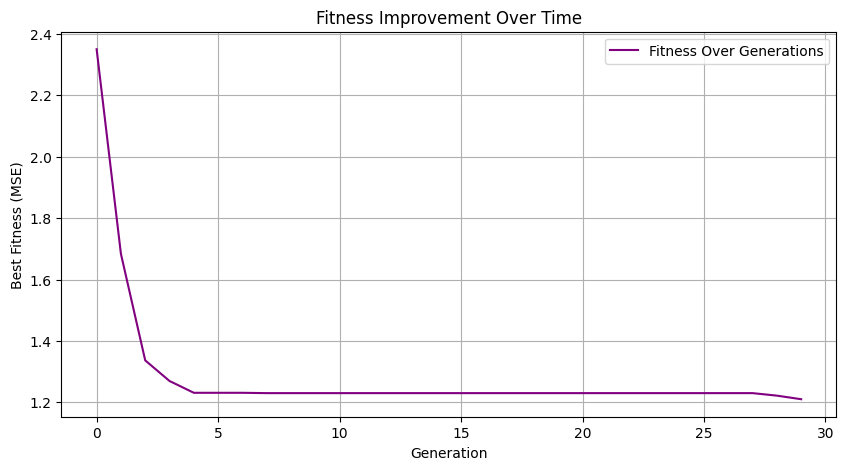

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed  # For parallel fitness evaluation

# Define parameters
T = 1e-4       # Total duration of radar pulse
B = 1e6        # Bandwidth
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies
t = np.linspace(0, T, 1000)         # High-resolution time vector

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return np.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return np.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) * ((t >= l * Tb) & (t < (l + 1) * Tb))

# Construct the approximated radar pulse
def construct_s_opt(c_opt, t):
    s_opt = np.zeros(len(t), dtype=complex)
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Normalize a signal to have unit energy
def normalize_signal(signal):
    norm = np.sqrt(np.sum(np.abs(signal)**2))
    return signal / norm if norm != 0 else signal

# Fitness function to minimize the Mean Squared Error (MSE)
def calculate_fitness(c_opt):
    s_approx = construct_s_opt(c_opt, t)
    lfm_norm = lfm_pulse(t)  # Remove normalization for direct comparison
    mse = np.mean(np.abs(lfm_norm - s_approx) ** 2)
    return mse

# Parallelized fitness evaluation
def calculate_population_fitness(population):
    return Parallel(n_jobs=-1)(delayed(calculate_fitness)(individual) for individual in population)

# Local Search (Gradient Descent-like Refinement)
def local_search(best_solution, learning_rate=0.01, max_iter=20):
    refined_solution = best_solution.copy()
    for _ in range(max_iter):
        gradient = np.random.uniform(-1, 1, len(refined_solution))  # Approximate gradient
        refined_solution -= learning_rate * gradient
        if calculate_fitness(refined_solution) < calculate_fitness(best_solution):
            best_solution = refined_solution
    return best_solution

# Hybrid Genetic Algorithm
def hybrid_genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, elitism_rate=0.2):
    num_genes = K * L
    population = np.random.uniform(low=-1.0, high=1.0, size=(pop_size, num_genes))
    best_fitness_history = []

    for generation in range(generations):
        # Evaluate fitness in parallel
        fitness = np.array(calculate_population_fitness(population))
        best_fitness = np.min(fitness)
        best_individual = population[np.argmin(fitness)]
        best_fitness_history.append(best_fitness)
        print(f"Generation {generation + 1}/{generations}: Best fitness = {best_fitness:.6f}")

        # Apply local search selectively
        if generation % 5 == 0 or generation == generations - 1:
            refined_solution = local_search(best_individual)
            refined_fitness = calculate_fitness(refined_solution)
            if refined_fitness < best_fitness:
                best_individual = refined_solution
                best_fitness = refined_fitness

        # Elitism
        num_elites = int(elitism_rate * pop_size)
        elites = population[np.argsort(fitness)[:num_elites]]

        # New population
        new_population = []
        while len(new_population) < pop_size - num_elites:
            parent1, parent2 = tournament_selection(population, fitness), tournament_selection(population, fitness)
            child = blend_crossover(parent1, parent2, alpha=0.5)
            if np.random.rand() < mutation_rate:
                child = gaussian_mutation(child)
            new_population.append(child)

        # Add elites to the new population
        new_population.extend(elites)
        population = np.array(new_population)

    # Return the best solution
    final_fitness = calculate_population_fitness(population)
    best_solution = population[np.argmin(final_fitness)]
    return best_solution, best_fitness_history

# Selection, crossover, and mutation helpers
def tournament_selection(population, fitness, tournament_size=3):
    selected_indices = np.random.choice(len(population), tournament_size)
    selected_fitness = fitness[selected_indices]
    return population[selected_indices[np.argmin(selected_fitness)]]

def blend_crossover(parent1, parent2, alpha=0.5):
    return alpha * parent1 + (1 - alpha) * parent2

def gaussian_mutation(individual, mutation_scale=0.1):
    mutation = np.random.normal(scale=mutation_scale, size=len(individual))
    return individual + mutation

# Run the Genetic Algorithm
best_c_opt, fitness_history = hybrid_genetic_algorithm()

# Construct the approximated radar pulse s_opt(t)
s_opt = construct_s_opt(best_c_opt, t)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, np.real(lfm_pulse(t)), label="Exact LFM Pulse", color='blue')
plt.plot(t, np.real(s_opt), linestyle='--', label="Optimized Pulse \(s_{opt}(t)\)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Radar Pulse Approximation using Hybrid Genetic Algorithm")
plt.legend()
plt.grid(True)
plt.show()

# Plot fitness history
plt.figure(figsize=(10, 5))
plt.plot(fitness_history, label='Fitness Over Generations', color='purple')
plt.xlabel("Generation")
plt.ylabel("Best Fitness (MSE)")
plt.title("Fitness Improvement Over Time")
plt.grid(True)
plt.legend()
plt.show()


Generation 1: Best fitness = 2.345670
Generation 2: Best fitness = 1.597051
Generation 3: Best fitness = 1.265030
Generation 4: Best fitness = 1.167065
Generation 5: Best fitness = 1.153996
Generation 6: Best fitness = 1.153996
Generation 7: Best fitness = 1.145638
Generation 8: Best fitness = 1.145638
Generation 9: Best fitness = 1.132782
Generation 10: Best fitness = 1.132782
Generation 11: Best fitness = 1.132782
Generation 12: Best fitness = 1.132708
Generation 13: Best fitness = 1.132648
Generation 14: Best fitness = 1.132615
Generation 15: Best fitness = 1.132615
Generation 16: Best fitness = 1.132615
Generation 17: Best fitness = 1.132615
Generation 18: Best fitness = 1.132615
Generation 19: Best fitness = 1.132615
Generation 20: Best fitness = 1.132615
Generation 21: Best fitness = 1.132615
Generation 22: Best fitness = 1.125529
Generation 23: Best fitness = 1.115577
Generation 24: Best fitness = 1.115577
Generation 25: Best fitness = 1.110328
Generation 26: Best fitness = 1.11

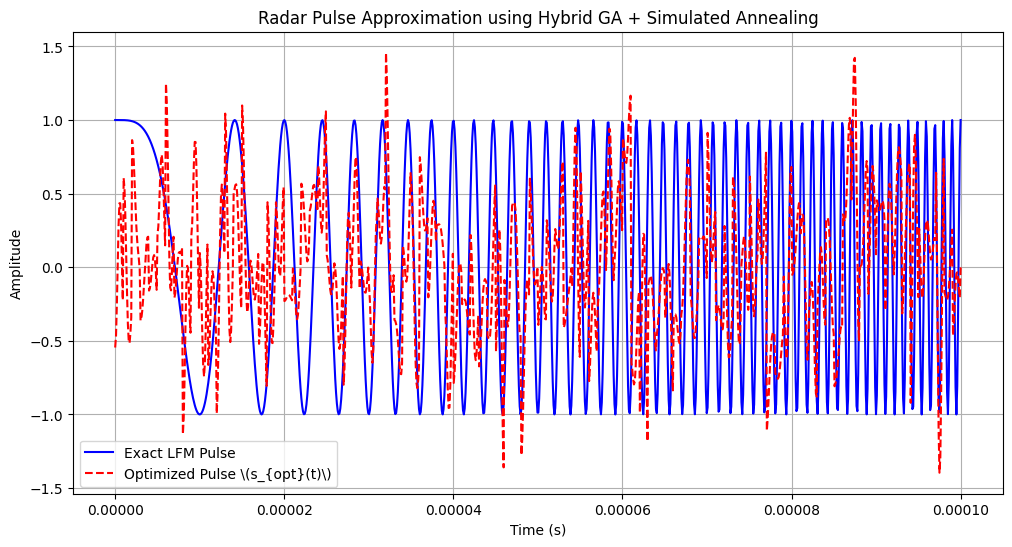

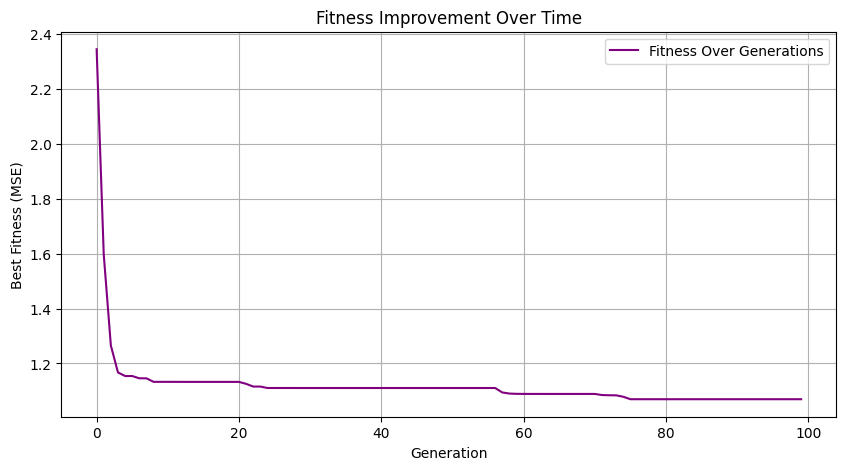

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import torch

# Parameters
T = 1e-4       # Total duration of radar pulse
B = 1e6        # Bandwidth
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies
t = torch.linspace(0, T, 1000).cuda()  # Time vector on GPU

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return torch.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return (torch.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) *
            ((t >= l * Tb) & (t < (l + 1) * Tb)))

# Construct the approximated radar pulse s(t)
def construct_s_opt(c_opt, t):
    s_opt = torch.zeros(len(t), dtype=torch.cfloat).cuda()
    c_opt = torch.tensor(c_opt).cuda()
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Fitness function (MSE calculation)
def calculate_fitness(c_opt):
    s_approx = construct_s_opt(c_opt, t)
    lfm = lfm_pulse(t)  # LFM pulse for comparison
    mse = torch.mean(torch.abs(lfm - s_approx) ** 2).item()  # Mean Squared Error
    return mse

# Simulated Annealing refinement
def simulated_annealing(c_opt, max_iter=1000, temp=1.0, cooling_rate=0.995):
    best_solution = c_opt
    best_fitness = calculate_fitness(c_opt)

    current_solution = c_opt.copy()
    current_fitness = best_fitness

    for i in range(max_iter):
        # Generate a new candidate solution
        new_solution = current_solution + np.random.normal(0, 0.1, len(c_opt))
        new_fitness = calculate_fitness(new_solution)

        # Accept or reject based on temperature
        if new_fitness < current_fitness or np.random.rand() < np.exp(-(new_fitness - current_fitness) / temp):
            current_solution = new_solution
            current_fitness = new_fitness

        # Update best solution
        if current_fitness < best_fitness:
            best_solution = current_solution
            best_fitness = current_fitness

        # Cool down
        temp *= cooling_rate

    return best_solution

# Hybrid Genetic Algorithm
def hybrid_genetic_algorithm(pop_size=20, generations=100, mutation_rate=0.1, elitism_rate=0.2):
    num_genes = K * L
    population = np.random.uniform(-1.0, 1.0, (pop_size, num_genes))
    best_fitness_history = []

    for generation in range(generations):
        # Evaluate fitness for each individual
        fitness = np.array([calculate_fitness(ind) for ind in population])
        best_idx = np.argmin(fitness)
        best_fitness = fitness[best_idx]
        best_fitness_history.append(best_fitness)
        print(f"Generation {generation + 1}: Best fitness = {best_fitness:.6f}")

        # Elitism
        num_elites = int(elitism_rate * pop_size)
        elites = population[np.argsort(fitness)[:num_elites]]

        # New population
        new_population = []
        while len(new_population) < pop_size - num_elites:
            parent1, parent2 = tournament_selection(population, fitness), tournament_selection(population, fitness)
            child = blend_crossover(parent1, parent2)
            if np.random.rand() < mutation_rate:
                child = gaussian_mutation(child)
            new_population.append(child)

        # Add elites
        new_population.extend(elites)
        population = np.array(new_population)

    # Simulated Annealing refinement for the best individual
    best_solution = population[np.argmin(fitness)]
    refined_solution = simulated_annealing(best_solution)
    return refined_solution, best_fitness_history

# Selection, crossover, and mutation helpers
def tournament_selection(population, fitness, tournament_size=3):
    selected_indices = np.random.choice(len(population), tournament_size)
    selected_fitness = fitness[selected_indices]
    return population[selected_indices[np.argmin(selected_fitness)]]

def blend_crossover(parent1, parent2, alpha=0.5):
    return alpha * parent1 + (1 - alpha) * parent2

def gaussian_mutation(individual, mutation_scale=0.1):
    mutation = np.random.normal(0, mutation_scale, len(individual))
    return individual + mutation

# Run the hybrid GA
best_c_opt, fitness_history = hybrid_genetic_algorithm()

# Construct the optimized radar pulse
s_opt = construct_s_opt(best_c_opt, t).cpu().numpy()
lfm = lfm_pulse(t).cpu().numpy()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t.cpu().numpy(), np.real(lfm), label="Exact LFM Pulse", color='blue')
plt.plot(t.cpu().numpy(), np.real(s_opt), linestyle='--', label="Optimized Pulse \(s_{opt}(t)\)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Radar Pulse Approximation using Hybrid GA + Simulated Annealing")
plt.legend()
plt.grid(True)
plt.show()

# Plot fitness history
plt.figure(figsize=(10, 5))
plt.plot(fitness_history, label='Fitness Over Generations', color='purple')
plt.xlabel("Generation")
plt.ylabel("Best Fitness (MSE)")
plt.title("Fitness Improvement Over Time")
plt.grid(True)
plt.legend()
plt.show()


In [1]:
!pip install deap

gen	nevals	min   	mean   
0  	20    	2.3303	2.66918
1  	13    	2.3303	2.67067
2  	10    	2.3303	2.52955
3  	14    	2.30433	2.45373
4  	9     	2.29961	2.34396
5  	15    	2.26738	2.32267
6  	12    	2.28587	2.32462
7  	16    	2.20444	2.33714
8  	8     	2.20444	2.28426
9  	13    	2.20444	2.26844
10 	10    	2.19192	2.25197
11 	12    	2.19192	2.21013
12 	9     	2.18482	2.20431
13 	9     	2.18482	2.20204
14 	14    	2.18442	2.19899
15 	15    	2.17092	2.19124
16 	13    	2.16201	2.1838 
17 	15    	2.15235	2.17573
18 	12    	2.13431	2.16831
19 	17    	2.12173	2.1577 
20 	15    	2.12677	2.14719
21 	14    	2.11749	2.13957
22 	14    	2.11266	2.13265
23 	14    	2.09646	2.12382
24 	11    	2.08738	2.11201
25 	11    	2.08738	2.10355
26 	13    	2.07472	2.0962 
27 	9     	2.06402	2.08293
28 	15    	2.06366	2.0774 
29 	10    	2.03936	2.07034
30 	15    	2.02644	2.05889


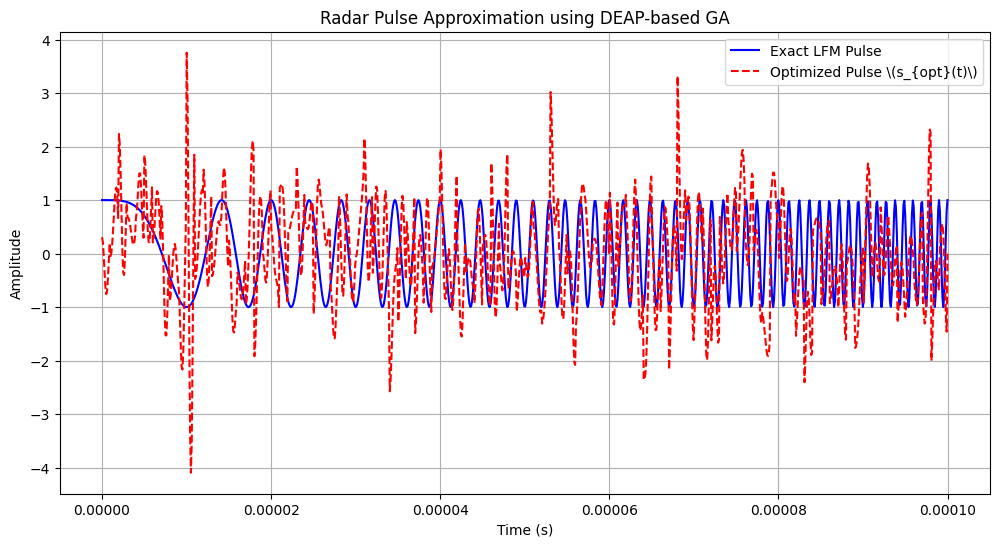

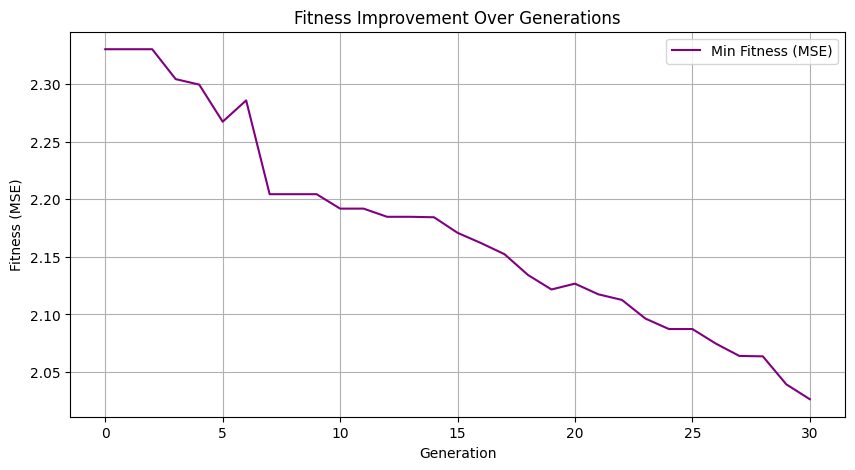

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import torch

# Parameters
T = 1e-4       # Total duration of radar pulse
B = 1e6        # Bandwidth
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies
t = torch.linspace(0, T, 1000).cuda()  # Time vector on GPU

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return torch.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return (torch.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) *
            ((t >= l * Tb) & (t < (l + 1) * Tb)))

# Construct the approximated radar pulse s(t)
def construct_s_opt(c_opt, t):
    s_opt = torch.zeros(len(t), dtype=torch.cfloat).cuda()
    c_opt = torch.tensor(c_opt).cuda()
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Fitness function (MSE calculation)
def calculate_fitness(c_opt):
    s_approx = construct_s_opt(c_opt, t)
    lfm = lfm_pulse(t)  # LFM pulse for comparison
    mse = torch.mean(torch.abs(lfm - s_approx) ** 2).item()  # Mean Squared Error
    return mse,

# Setup DEAP for GA
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize MSE
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -1.0, 1.0)  # Random coefficients
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, K * L)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", calculate_fitness)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Blend crossover
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)  # Gaussian mutation
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the Genetic Algorithm
def run_deap_ga(pop_size=20, generations=30, cxpb=0.5, mutpb=0.2):
    population = toolbox.population(n=pop_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("mean", np.mean)

    # Apply DEAP's GA with logging
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, generations, stats=stats, verbose=True)

    # Extract the best individual
    best_ind = tools.selBest(population, 1)[0]
    return best_ind, logbook

# Run the DEAP-based GA
best_c_opt, logbook = run_deap_ga()

# Construct the optimized radar pulse
s_opt = construct_s_opt(best_c_opt, t).cpu().numpy()
lfm = lfm_pulse(t).cpu().numpy()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t.cpu().numpy(), np.real(lfm), label="Exact LFM Pulse", color='blue')
plt.plot(t.cpu().numpy(), np.real(s_opt), linestyle='--', label="Optimized Pulse \(s_{opt}(t)\)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Radar Pulse Approximation using DEAP-based GA")
plt.legend()
plt.grid(True)
plt.show()

# Plot fitness over generations
gen = logbook.select("gen")
min_fitness = logbook.select("min")
plt.figure(figsize=(10, 5))
plt.plot(gen, min_fitness, label="Min Fitness (MSE)", color="purple")
plt.xlabel("Generation")
plt.ylabel("Fitness (MSE)")
plt.title("Fitness Improvement Over Generations")
plt.legend()
plt.grid(True)
plt.show()


Generation 1/30: Best fitness = 2.491927
Generation 2/30: Best fitness = 2.491927
Generation 3/30: Best fitness = 2.449373
Generation 4/30: Best fitness = 2.449373
Generation 5/30: Best fitness = 2.449373
Refinement applied. Refined fitness = 2.449373
Generation 6/30: Best fitness = 2.412412
Generation 7/30: Best fitness = 2.412412
Generation 8/30: Best fitness = 2.412412
Generation 9/30: Best fitness = 2.399424
Generation 10/30: Best fitness = 2.276250
Refinement applied. Refined fitness = 2.276250
Generation 11/30: Best fitness = 2.328477
Generation 12/30: Best fitness = 2.247740
Generation 13/30: Best fitness = 2.247740
Generation 14/30: Best fitness = 2.247740
Generation 15/30: Best fitness = 2.224571
Refinement applied. Refined fitness = 2.224571
Generation 16/30: Best fitness = 2.224571
Generation 17/30: Best fitness = 2.197366
Generation 18/30: Best fitness = 2.197366
Generation 19/30: Best fitness = 2.188137
Generation 20/30: Best fitness = 2.140675
Refinement applied. Refined 

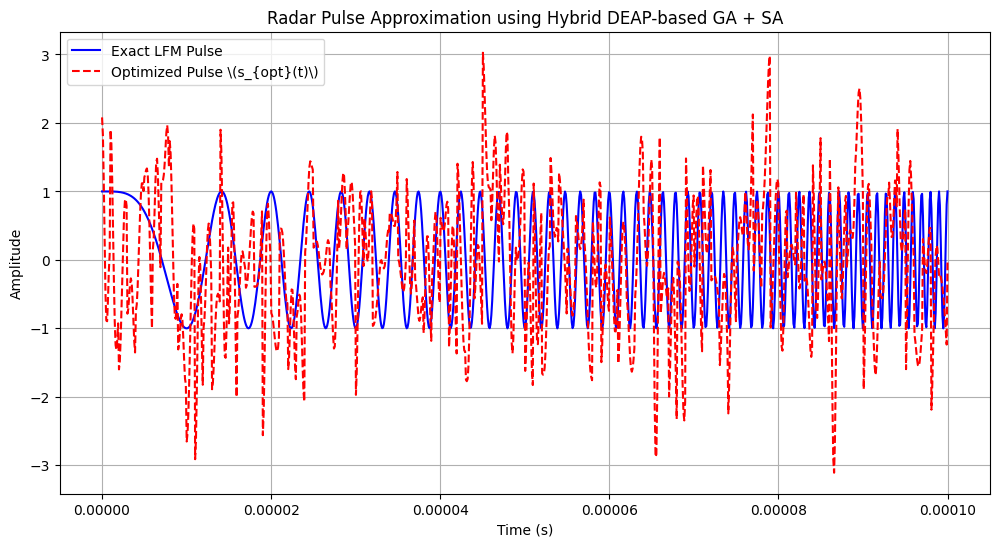

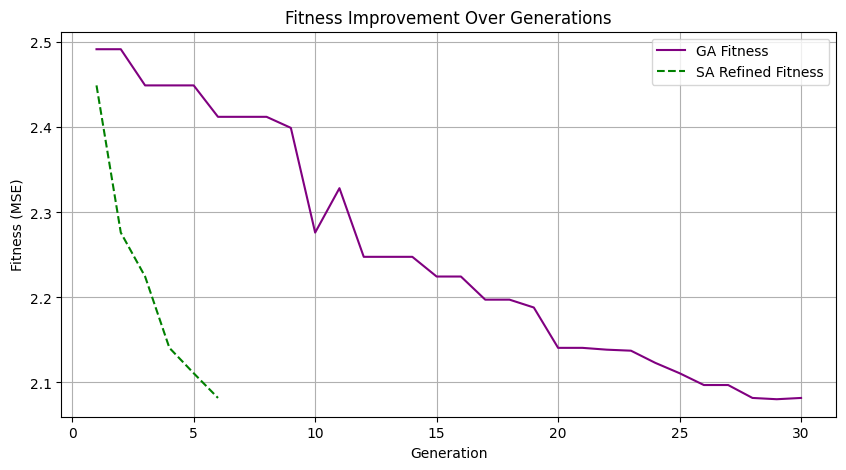

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import torch

# Parameters
T = 1e-4       # Total duration of radar pulse
B = 1e6        # Bandwidth
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies
t = torch.linspace(0, T, 1000).cuda()  # Time vector on GPU

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return torch.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return (torch.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) *
            ((t >= l * Tb) & (t < (l + 1) * Tb)))

# Construct the approximated radar pulse s(t)
def construct_s_opt(c_opt, t):
    s_opt = torch.zeros(len(t), dtype=torch.cfloat).cuda()
    c_opt = torch.tensor(c_opt).cuda()
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Fitness function (MSE calculation)
def calculate_fitness(c_opt):
    s_approx = construct_s_opt(c_opt, t)
    lfm = lfm_pulse(t)  # LFM pulse for comparison
    mse = torch.mean(torch.abs(lfm - s_approx) ** 2).item()  # Mean Squared Error
    return mse,

# Simulated Annealing for local refinement
def simulated_annealing(c_opt, max_iter=500, temp=1.0, cooling_rate=0.99):
    """Simulated Annealing refinement for the best solution."""
    current_solution = np.array(c_opt, copy=True)
    best_solution = current_solution.copy()
    best_fitness = calculate_fitness(current_solution)[0]

    for i in range(max_iter):
        # Generate new candidate solution
        new_solution = current_solution + np.random.normal(0, 0.1, len(current_solution))
        new_fitness = calculate_fitness(new_solution)[0]

        # Accept with probability based on temperature
        if new_fitness < best_fitness or np.random.rand() < np.exp(-(new_fitness - best_fitness) / temp):
            current_solution = new_solution
            best_fitness = new_fitness

        # Update best solution if needed
        if new_fitness < best_fitness:
            best_solution = new_solution.copy()
            best_fitness = new_fitness

        # Cool down temperature
        temp *= cooling_rate

    return best_solution

# Setup DEAP for GA
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize MSE
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -1.0, 1.0)  # Random coefficients
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, K * L)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", calculate_fitness)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Blend crossover
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)  # Gaussian mutation
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the Hybrid Genetic Algorithm
def run_hybrid_ga(pop_size=20, generations=30, cxpb=0.5, mutpb=0.2, sa_every=5):
    population = toolbox.population(n=pop_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("mean", np.mean)

    best_fitness_history = []
    refined_fitness_history = []

    for gen in range(generations):
        # Apply DEAP's GA step
        offspring = algorithms.varAnd(population, toolbox, cxpb, mutpb)
        fitnesses = map(toolbox.evaluate, offspring)
        for ind, fit in zip(offspring, fitnesses):
            ind.fitness.values = fit
        population = toolbox.select(offspring, len(population))

        # Log statistics
        fits = [ind.fitness.values[0] for ind in population]
        best_fitness = np.min(fits)
        best_ind = tools.selBest(population, 1)[0]
        best_fitness_history.append(best_fitness)
        print(f"Generation {gen + 1}/{generations}: Best fitness = {best_fitness:.6f}")

        # Apply Simulated Annealing every sa_every generations or in the final generation
        if (gen + 1) % sa_every == 0 or gen == generations - 1:
            refined_solution = simulated_annealing(best_ind)
            refined_fitness = calculate_fitness(refined_solution)[0]
            refined_fitness_history.append(refined_fitness)
            print(f"Refinement applied. Refined fitness = {refined_fitness:.6f}")
            best_ind[:] = refined_solution

    return tools.selBest(population, 1)[0], best_fitness_history, refined_fitness_history

# Run the hybrid GA
best_c_opt, fitness_history, refined_history = run_hybrid_ga()

# Construct the optimized radar pulse
s_opt = construct_s_opt(best_c_opt, t).cpu().numpy()
lfm = lfm_pulse(t).cpu().numpy()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t.cpu().numpy(), np.real(lfm), label="Exact LFM Pulse", color='blue')
plt.plot(t.cpu().numpy(), np.real(s_opt), linestyle='--', label="Optimized Pulse \(s_{opt}(t)\)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Radar Pulse Approximation using Hybrid DEAP-based GA + SA")
plt.legend()
plt.grid(True)
plt.show()

# Plot fitness over generations
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(fitness_history) + 1), fitness_history, label="GA Fitness", color="purple")
if refined_history:
    plt.plot(range(1, len(refined_history) + 1), refined_history, label="SA Refined Fitness", color="green", linestyle="--")
plt.xlabel("Generation")
plt.ylabel("Fitness (MSE)")
plt.title("Fitness Improvement Over Generations")
plt.legend()
plt.grid(True)
plt.show()


gen	nevals	min    	mean   
0  	20    	43.3003	71.9334
1  	10    	43.3003	79.0809
2  	7     	43.3003	69.6153
3  	15    	58.3476	75.9625
4  	8     	58.296 	67.4282
5  	12    	58.289 	65.7699
6  	16    	57.0637	64.6022
7  	13    	57.8004	66.079 
8  	12    	55.8512	62.3489
9  	9     	55.8512	57.8269
10 	11    	54.0756	56.7738
11 	6     	54.0756	55.9483
12 	10    	53.2786	54.758 
13 	10    	52.9584	54.2519
14 	10    	52.2469	53.7247
15 	7     	51.2358	53.2461
16 	10    	48.9584	52.7173
17 	10    	48.9584	51.6523
18 	9     	48.9584	50.7293
19 	13    	48.6973	50.6018
20 	12    	46.9596	49.7792
21 	16    	47.3227	49.4015
22 	13    	47.3227	48.3369
23 	14    	46.47  	48.1881
24 	14    	46.0783	47.7859
25 	16    	46.1121	47.605 
26 	13    	43.9044	47.1289
27 	12    	43.7021	46.6709
28 	16    	42.3038	45.9535
29 	11    	41.9679	44.838 
30 	17    	40.2229	43.8774
31 	13    	40.256 	42.9787
32 	12    	38.0566	41.8868
33 	13    	37.8015	40.37  
34 	9     	38.0566	39.6497
35 	14    	37.473 	38.9087
3

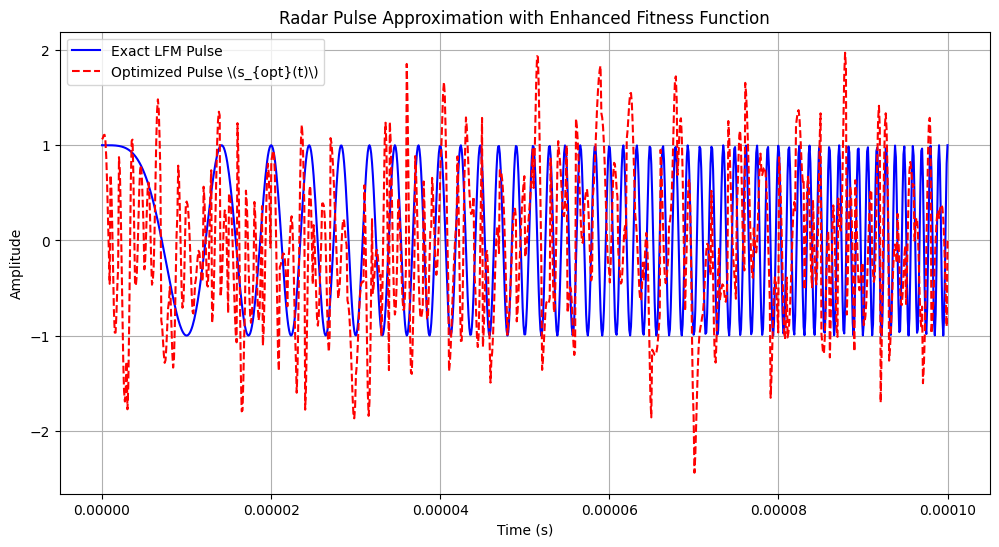

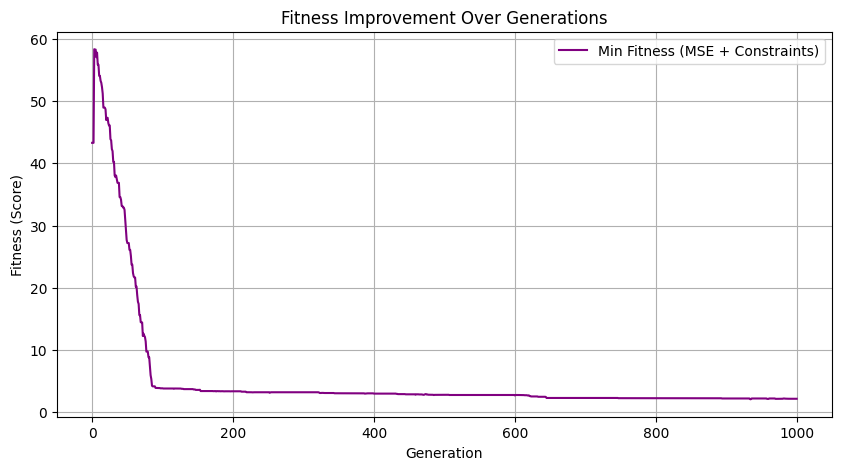

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import torch

# Parameters
T = 1e-4       # Total duration of radar pulse
B = 1e6        # Bandwidth
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies
t = torch.linspace(0, T, 1000).cuda()  # Time vector on GPU

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return torch.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return (torch.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) *
            ((t >= l * Tb) & (t < (l + 1) * Tb)))

# Construct the approximated radar pulse s(t)
def construct_s_opt(c_opt, t):
    s_opt = torch.zeros(len(t), dtype=torch.cfloat).cuda()
    c_opt = torch.tensor(c_opt).cuda()
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Cross-correlation function
def cross_correlation(r, s):
    r_real = r.cpu().numpy().real
    s_real = s.cpu().numpy().real
    correlation = np.correlate(r_real, s_real, mode="full")
    return np.max(correlation) / (np.linalg.norm(r_real) * np.linalg.norm(s_real))

# Fitness function with multiple criteria
def calculate_fitness(c_opt):
    s_approx = construct_s_opt(c_opt, t)
    r_signal = lfm_pulse(t)

    # Cross-correlation (maximize peak correlation)
    peak_corr = cross_correlation(r_signal, s_approx)

    # Energy penalty
    energy_r = torch.sum(torch.abs(r_signal) ** 2).item()
    energy_s = torch.sum(torch.abs(s_approx) ** 2).item()
    energy_penalty = abs(energy_r - energy_s)

    # Continuity penalty (smoothness via derivative)
    s_derivative = torch.diff(torch.abs(s_approx), n=1)
    continuity_penalty = torch.sum(s_derivative ** 2).item()

    # Fitness score (lower is better)
    fitness = -peak_corr + 0.1 * energy_penalty + 0.05 * continuity_penalty
    return fitness,

# Setup DEAP for GA
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize fitness
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -1.0, 1.0)  # Random coefficients
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, K * L)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", calculate_fitness)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Blend crossover
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)  # Gaussian mutation
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the Genetic Algorithm
def run_ga_with_constraints(pop_size=20, generations=1000, cxpb=0.5, mutpb=0.2):
    population = toolbox.population(n=pop_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("mean", np.mean)

    # Apply DEAP's GA with logging
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, generations, stats=stats, verbose=True)

    # Extract the best individual
    best_ind = tools.selBest(population, 1)[0]
    return best_ind, logbook

# Run the GA
best_c_opt, logbook = run_ga_with_constraints()

# Construct the optimized radar pulse
s_opt = construct_s_opt(best_c_opt, t).cpu().numpy()
lfm = lfm_pulse(t).cpu().numpy()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t.cpu().numpy(), np.real(lfm), label="Exact LFM Pulse", color='blue')
plt.plot(t.cpu().numpy(), np.real(s_opt), linestyle='--', label="Optimized Pulse \(s_{opt}(t)\)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Radar Pulse Approximation with Enhanced Fitness Function")
plt.legend()
plt.grid(True)
plt.show()

# Plot fitness over generations
gen = logbook.select("gen")
min_fitness = logbook.select("min")
plt.figure(figsize=(10, 5))
plt.plot(gen, min_fitness, label="Min Fitness (MSE + Constraints)", color="purple")
plt.xlabel("Generation")
plt.ylabel("Fitness (Score)")
plt.title("Fitness Improvement Over Generations")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-8-6ab9f2a62e0e>:42: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1036.)
  correlation = torch.conv1d(r_real.unsqueeze(0).unsqueeze(0), s_flipped.unsqueeze(0).unsqueeze(0), padding="same")


gen	nevals	min             	mean             
0  	20    	56.4912223815918	76.98918914794922
1  	10    	56.4912223815918	87.50984191894531
2  	16    	56.4912223815918	93.23155975341797
3  	14    	51.84133529663086	85.10337829589844
4  	11    	51.84133529663086	76.99833679199219
5  	10    	51.84133529663086	77.0749740600586 
6  	14    	51.593345642089844	64.70103454589844
7  	9     	51.13679504394531 	53.179931640625  
8  	11    	51.593345642089844	52.0182991027832 
9  	13    	51.430843353271484	51.94744110107422
10 	10    	49.749908447265625	51.54743576049805
11 	10    	47.60395812988281 	51.16041946411133
12 	8     	47.42010498046875 	49.957733154296875
13 	14    	46.41672134399414 	49.01778793334961 
14 	9     	46.05912399291992 	47.97620391845703 
15 	11    	45.6818733215332  	47.00714874267578 
16 	12    	45.6818733215332  	46.631813049316406
17 	16    	43.880191802978516	46.44083786010742 
18 	16    	42.332916259765625	45.43367385864258 
19 	9     	42.332916259765625	44.03176498413

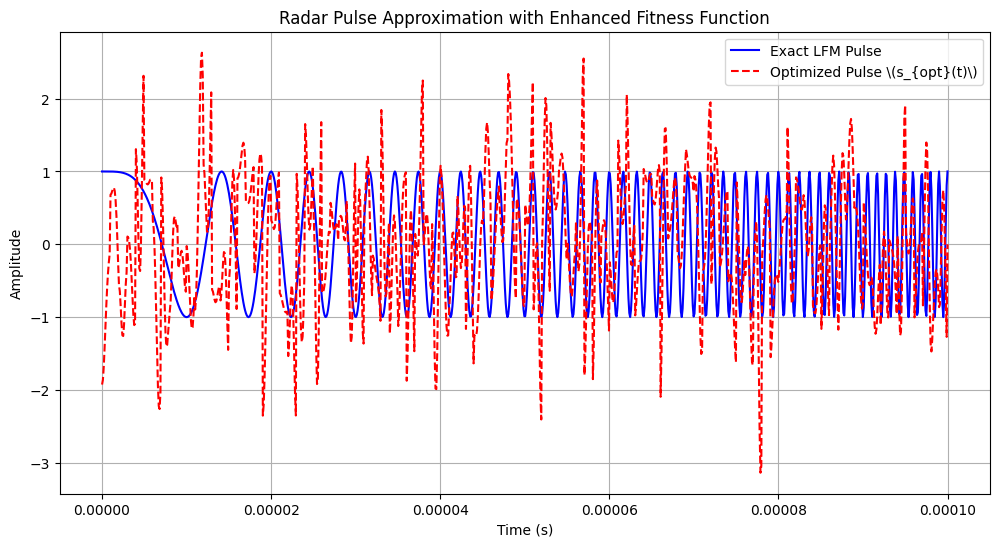

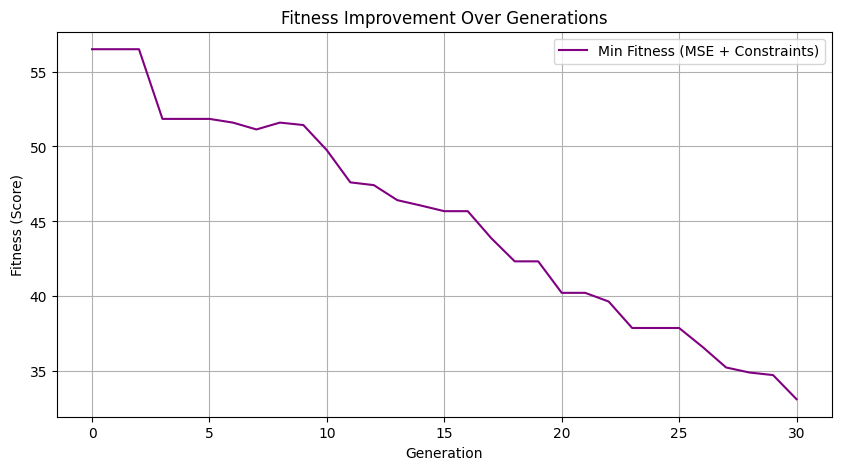

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import torch

# Parameters
T = 1e-4       # Total duration of radar pulse
B = 1e6        # Bandwidth
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies
t = torch.linspace(0, T, 1000)  # Time vector (on CPU)

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return torch.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return (torch.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) *
            ((t >= l * Tb) & (t < (l + 1) * Tb)))

# Construct the approximated radar pulse s(t)
def construct_s_opt(c_opt, t):
    s_opt = torch.zeros(len(t), dtype=torch.cfloat)
    c_opt = torch.tensor(c_opt)
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Cross-correlation function using torch's convolution
def cross_correlation(r, s):
    r_real = r.real
    s_real = s.real

    # Flip signal for cross-correlation and perform 1D convolution
    s_flipped = torch.flip(s_real, [0])
    correlation = torch.conv1d(r_real.unsqueeze(0).unsqueeze(0), s_flipped.unsqueeze(0).unsqueeze(0), padding="same")

    # Normalize the correlation
    max_corr = torch.max(correlation)
    norm_r = torch.norm(r_real)
    norm_s = torch.norm(s_real)

    return max_corr / (norm_r * norm_s)

# Fitness function with multiple criteria
def calculate_fitness(c_opt):
    s_approx = construct_s_opt(c_opt, t)
    r_signal = lfm_pulse(t)

    # Cross-correlation (maximize peak correlation)
    peak_corr = cross_correlation(r_signal, s_approx)

    # Energy penalty
    energy_r = torch.sum(torch.abs(r_signal) ** 2)
    energy_s = torch.sum(torch.abs(s_approx) ** 2)
    energy_penalty = torch.abs(energy_r - energy_s)

    # Continuity penalty (smoothness via derivative)
    s_derivative = torch.diff(torch.abs(s_approx), n=1)
    continuity_penalty = torch.sum(s_derivative ** 2)

    # Fitness score (lower is better)
    fitness = -peak_corr + 0.1 * energy_penalty + 0.05 * continuity_penalty
    return fitness,

# Setup DEAP for GA
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize fitness
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -1.0, 1.0)  # Random coefficients
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, K * L)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", calculate_fitness)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Blend crossover
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)  # Gaussian mutation
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the Genetic Algorithm
def run_ga_with_constraints(pop_size=20, generations=30, cxpb=0.5, mutpb=0.2):
    population = toolbox.population(n=pop_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("mean", np.mean)

    # Apply DEAP's GA with logging
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, generations, stats=stats, verbose=True)

    # Extract the best individual
    best_ind = tools.selBest(population, 1)[0]
    return best_ind, logbook

# Run the GA
best_c_opt, logbook = run_ga_with_constraints()

# Construct the optimized radar pulse
s_opt = construct_s_opt(best_c_opt, t).numpy()  # Move to numpy for plotting
lfm = lfm_pulse(t).numpy()  # Move to numpy for plotting

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t.numpy(), np.real(lfm), label="Exact LFM Pulse", color='blue')
plt.plot(t.numpy(), np.real(s_opt), linestyle='--', label="Optimized Pulse \(s_{opt}(t)\)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Radar Pulse Approximation with Enhanced Fitness Function")
plt.legend()
plt.grid(True)
plt.show()

# Plot fitness over generations
gen = logbook.select("gen")
min_fitness = logbook.select("min")
plt.figure(figsize=(10, 5))
plt.plot(gen, min_fitness, label="Min Fitness (MSE + Constraints)", color="purple")
plt.xlabel("Generation")
plt.ylabel("Fitness (Score)")
plt.title("Fitness Improvement Over Generations")
plt.legend()
plt.grid(True)
plt.show()


gen	nevals	min               	mean             
0  	20    	57.967552185058594	78.52101135253906
1  	11    	57.967552185058594	81.38528442382812
2  	13    	59.443931579589844	94.68106842041016
3  	12    	59.443931579589844	81.4398193359375 
4  	14    	60.28891372680664 	73.44161224365234
5  	12    	60.496429443359375	79.57173156738281
6  	12    	60.496429443359375	73.68516540527344
7  	18    	58.609561920166016	68.31237030029297
8  	10    	58.609561920166016	71.11994934082031
9  	10    	58.83061981201172 	60.83721160888672
10 	12    	58.799068450927734	60.129005432128906
11 	9     	58.799068450927734	59.55411911010742 
12 	13    	57.035491943359375	59.10997772216797 
13 	15    	57.253456115722656	58.94318771362305 
14 	12    	56.10995864868164 	57.907958984375   
15 	14    	56.10995864868164 	57.9178352355957  
16 	11    	54.123531341552734	57.24500274658203 
17 	12    	54.123531341552734	55.94321823120117 
18 	14    	51.75625991821289 	55.53020095825195 
19 	8     	51.75625991821289 	5

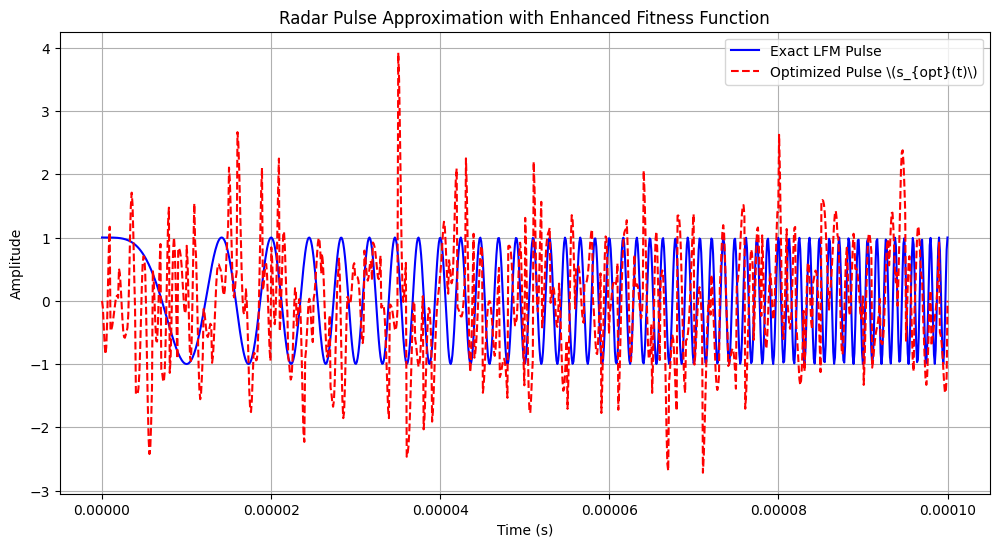

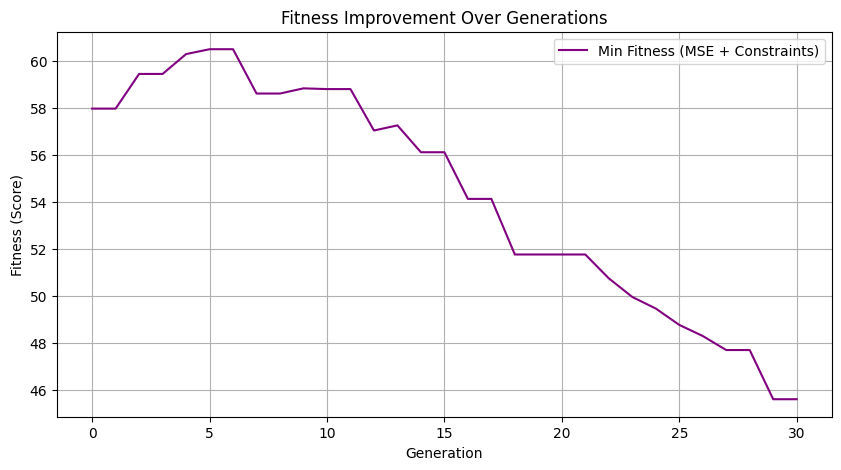

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import torch

# Parameters
T = 1e-4       # Total duration of radar pulse
B = 1e6        # Bandwidth
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies
t = torch.linspace(0, T, 1000)  # Time vector (on CPU)

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return torch.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return (torch.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) *
            ((t >= l * Tb) & (t < (l + 1) * Tb)))

# Construct the approximated radar pulse s(t)
def construct_s_opt(c_opt, t):
    s_opt = torch.zeros(len(t), dtype=torch.cfloat)
    c_opt = torch.tensor(c_opt)
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Mean Squared Error (MSE) function
def mean_squared_error(r, s):
    """Compute the MSE between the reference signal r and the approximated signal s."""
    return torch.mean(torch.abs(r - s) ** 2)

# Fitness function with MSE as the main criterion
def calculate_fitness(c_opt):
    s_approx = construct_s_opt(c_opt, t)
    r_signal = lfm_pulse(t)

    # MSE (minimize the difference between the two signals)
    mse = mean_squared_error(r_signal, s_approx)

    # Energy penalty
    energy_r = torch.sum(torch.abs(r_signal) ** 2)
    energy_s = torch.sum(torch.abs(s_approx) ** 2)
    energy_penalty = torch.abs(energy_r - energy_s)

    # Continuity penalty (smoothness via derivative)
    s_derivative = torch.diff(torch.abs(s_approx), n=1)
    continuity_penalty = torch.sum(s_derivative ** 2)

    # Fitness score (lower is better)
    fitness = mse + 0.1 * energy_penalty + 0.05 * continuity_penalty
    return fitness,

# Setup DEAP for GA
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize fitness
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -1.0, 1.0)  # Random coefficients
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, K * L)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", calculate_fitness)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Blend crossover
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)  # Gaussian mutation
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the Genetic Algorithm
def run_ga_with_constraints(pop_size=20, generations=30, cxpb=0.5, mutpb=0.2):
    population = toolbox.population(n=pop_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("mean", np.mean)

    # Apply DEAP's GA with logging
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, generations, stats=stats, verbose=True)

    # Extract the best individual
    best_ind = tools.selBest(population, 1)[0]
    return best_ind, logbook

# Run the GA
best_c_opt, logbook = run_ga_with_constraints()

# Construct the optimized radar pulse
s_opt = construct_s_opt(best_c_opt, t).numpy()  # Move to numpy for plotting
lfm = lfm_pulse(t).numpy()  # Move to numpy for plotting

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t.numpy(), np.real(lfm), label="Exact LFM Pulse", color='blue')
plt.plot(t.numpy(), np.real(s_opt), linestyle='--', label="Optimized Pulse \(s_{opt}(t)\)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Radar Pulse Approximation with Enhanced Fitness Function")
plt.legend()
plt.grid(True)
plt.show()

# Plot fitness over generations
gen = logbook.select("gen")
min_fitness = logbook.select("min")
plt.figure(figsize=(10, 5))
plt.plot(gen, min_fitness, label="Min Fitness (MSE + Constraints)", color="purple")
plt.xlabel("Generation")
plt.ylabel("Fitness (Score)")
plt.title("Fitness Improvement Over Generations")
plt.legend()
plt.grid(True)
plt.show()


gen	nevals	min               	mean              
0  	50    	137.93833923339844	217.86293029785156
1  	25    	137.93833923339844	209.04518127441406
2  	29    	137.93833923339844	218.37864685058594
3  	27    	137.019287109375  	201.5903778076172 
4  	28    	129.8068084716797 	179.20408630371094
5  	24    	129.45864868164062	150.62571716308594
6  	30    	129.45864868164062	160.92306518554688
7  	26    	121.8931884765625 	136.45669555664062
8  	33    	121.8931884765625 	132.89491271972656
9  	28    	121.52044677734375	130.34353637695312
10 	25    	122.2183837890625 	128.52101135253906
11 	29    	116.73822784423828	126.40335083007812
12 	32    	112.9207992553711 	123.78627014160156
13 	32    	108.3282699584961 	120.86967468261719
14 	35    	110.69387817382812	119.78536987304688
15 	22    	109.64710998535156	117.11332702636719
16 	24    	100.28087615966797	115.59957122802734
17 	38    	103.66049194335938	114.51136016845703
18 	35    	96.63984680175781 	111.67581176757812
19 	34    	90.732589

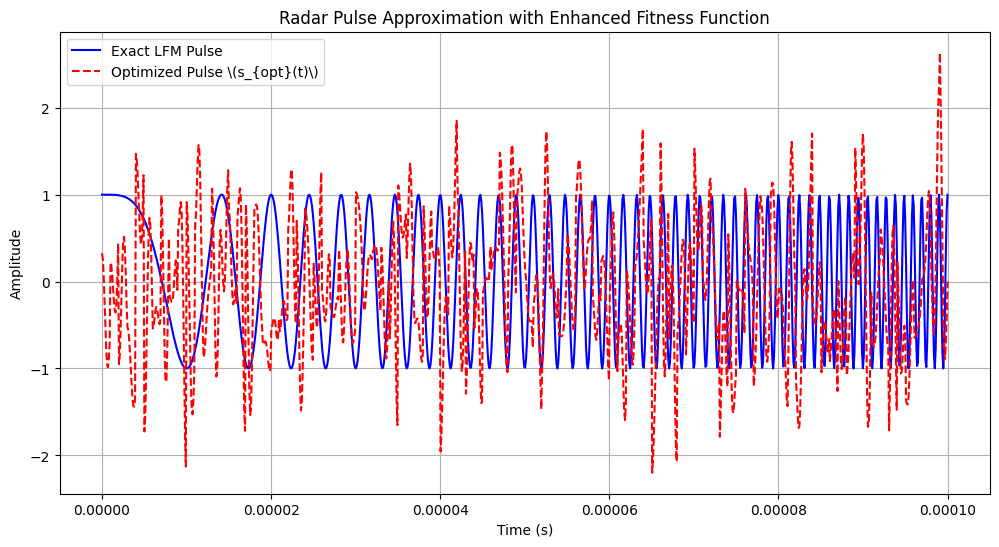

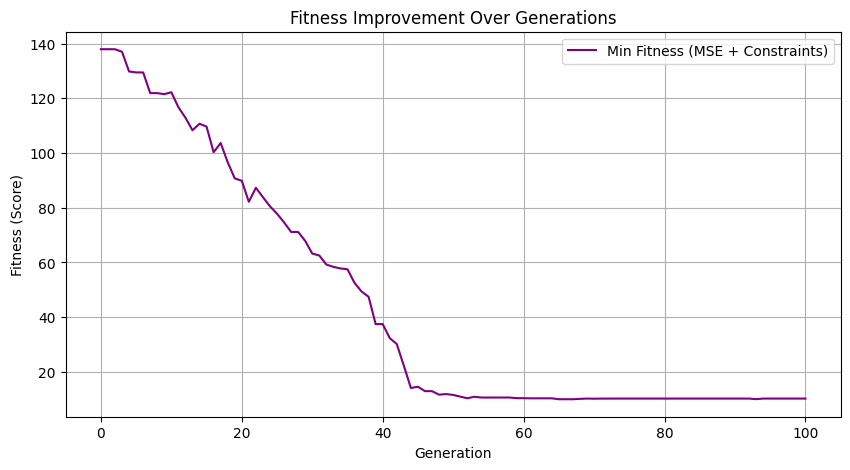

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import torch

# Parameters
T = 1e-4       # Total duration of radar pulse
B = 1e6        # Bandwidth
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies
t = torch.linspace(0, T, 1000)  # Time vector (on CPU)

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return torch.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return (torch.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) *
            ((t >= l * Tb) & (t < (l + 1) * Tb)))

# Construct the approximated radar pulse s(t)
def construct_s_opt(c_opt, t):
    s_opt = torch.zeros(len(t), dtype=torch.cfloat)
    c_opt = torch.tensor(c_opt)
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Mean Squared Error (MSE) function
def mean_squared_error(r, s):
    """Compute the MSE between the reference signal r and the approximated signal s."""
    return torch.mean(torch.abs(r - s) ** 2)

# Fitness function with MSE as the main criterion
def calculate_fitness(c_opt):
    s_approx = construct_s_opt(c_opt, t)
    r_signal = lfm_pulse(t)

    # MSE (minimize the difference between the two signals)
    mse = mean_squared_error(r_signal, s_approx)

    # Energy penalty (weight increased)
    energy_r = torch.sum(torch.abs(r_signal) ** 2)
    energy_s = torch.sum(torch.abs(s_approx) ** 2)
    energy_penalty = torch.abs(energy_r - energy_s)

    # Continuity penalty (smoothness via derivative) (weight increased)
    s_derivative = torch.diff(torch.abs(s_approx), n=1)
    continuity_penalty = torch.sum(s_derivative ** 2)

    # Fitness score (lower is better)
    fitness = mse + 0.3 * energy_penalty + 0.1 * continuity_penalty  # Increased penalty weights
    return fitness,

# Setup DEAP for GA
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize fitness
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -1.0, 1.0)  # Random coefficients
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, K * L)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", calculate_fitness)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Blend crossover
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)  # Gaussian mutation
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the Genetic Algorithm
def run_ga_with_constraints(pop_size=50, generations=100, cxpb=0.4, mutpb=0.3):
    population = toolbox.population(n=pop_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("mean", np.mean)

    # Apply DEAP's GA with logging
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, generations, stats=stats, verbose=True)

    # Extract the best individual
    best_ind = tools.selBest(population, 1)[0]
    return best_ind, logbook

# Run the GA
best_c_opt, logbook = run_ga_with_constraints()

# Construct the optimized radar pulse
s_opt = construct_s_opt(best_c_opt, t).numpy()  # Move to numpy for plotting
lfm = lfm_pulse(t).numpy()  # Move to numpy for plotting

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t.numpy(), np.real(lfm), label="Exact LFM Pulse", color='blue')
plt.plot(t.numpy(), np.real(s_opt), linestyle='--', label="Optimized Pulse \(s_{opt}(t)\)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Radar Pulse Approximation with Enhanced Fitness Function")
plt.legend()
plt.grid(True)
plt.show()

# Plot fitness over generations
gen = logbook.select("gen")
min_fitness = logbook.select("min")
plt.figure(figsize=(10, 5))
plt.plot(gen, min_fitness, label="Min Fitness (MSE + Constraints)", color="purple")
plt.xlabel("Generation")
plt.ylabel("Fitness (Score)")
plt.title("Fitness Improvement Over Generations")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	100   
1  	81    
2  	89    
3  	77    
4  	76    
5  	81    
6  	87    
7  	72    
8  	71    
9  	79    
10 	88    
11 	73    
12 	72    
13 	79    
14 	70    
15 	61    
16 	73    
17 	77    
18 	71    
19 	82    
20 	70    
21 	80    
22 	79    
23 	77    
24 	68    
25 	71    
26 	81    
27 	73    
28 	73    
29 	70    
30 	71    
31 	75    
32 	81    
33 	77    
34 	84    
35 	84    
36 	80    
37 	80    
38 	77    
39 	71    
40 	78    
41 	83    
42 	76    
43 	74    
44 	72    
45 	75    
46 	65    
47 	76    
48 	81    
49 	82    
50 	78    
51 	77    
52 	80    
53 	76    
54 	82    
55 	80    
56 	77    
57 	76    
58 	73    
59 	74    
60 	84    
61 	68    
62 	74    
63 	65    
64 	79    
65 	69    
66 	83    
67 	76    
68 	83    
69 	83    
70 	83    
71 	77    
72 	78    
73 	81    
74 	84    
75 	78    
76 	78    
77 	86    
78 	77    
79 	81    
80 	76    
81 	76    
82 	66    
83 	76    
84 	83    
85 	81    
86 	87    
87 	74    
88 	75    
89 	79    

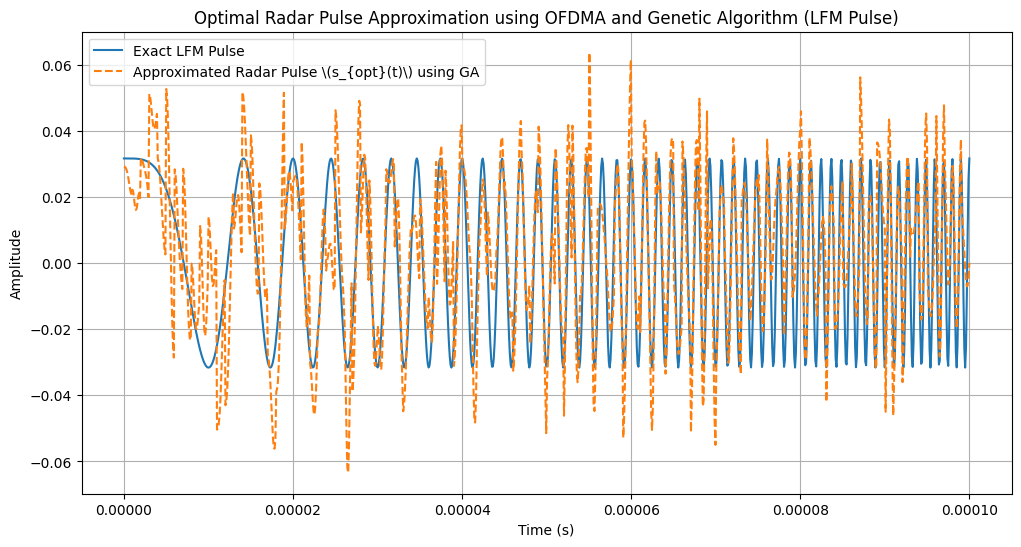

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Define parameters
T = 1e-4       # Total duration of radar pulse (1e-4 seconds)
B = 1e6        # Bandwidth of radar pulse (1 MHz)
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies linearly spaced in bandwidth B

# High-resolution time vector for plotting
t = np.linspace(0, T, 1000)

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return np.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return np.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) * ((t >= l * Tb) & (t < (l + 1) * Tb))

# Construct g(t) as a matrix of OFDMA signals for all K users and L bit intervals
def construct_g_matrix():
    g_matrix = np.zeros((K, L), dtype=object)  # Storing functions instead of values
    for k in range(K):
        for l in range(L):
            g_matrix[k, l] = lambda t, k=k, l=l: ofdma_signal(t, frequencies[k], l)
    return g_matrix

# Construct the approximated radar pulse s_opt(t) using the optimal coefficients
def construct_s_opt(c_opt, t):
    s_opt = np.zeros(len(t), dtype=complex)
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Normalize a signal to have unit energy
def normalize_signal(signal):
    norm = np.sqrt(np.sum(np.abs(signal)**2))
    return signal / norm

# Normalize the LFM pulse once outside the GA loop
lfm_normalized = normalize_signal(lfm_pulse(t))

# Define fitness function for GA (Mean Squared Error between LFM and approximated pulse)
def fitness(individual):
    c_opt = np.array(individual)  # Convert individual to the correct coefficients
    s_opt = construct_s_opt(c_opt, t)  # Reconstruct the approximated radar pulse
    s_opt_normalized = normalize_signal(s_opt)  # Normalize the reconstructed pulse
    mse = np.mean(np.abs(lfm_normalized - s_opt_normalized)**2)  # Calculate MSE
    return mse,

# Set up Genetic Algorithm (DEAP library)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize MSE
creator.create("Individual", list, fitness=creator.FitnessMin)

# Initialize population (chromosomes)
population = [creator.Individual(np.random.rand(K * L)) for _ in range(100)]  # 100 individuals

# Define crossover, mutation, and selection methods
toolbox = base.Toolbox()
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness)

# Run the genetic algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, stats=None, verbose=True)

# Extract the best solution
best_individual = tools.selBest(population, 1)[0]

# Reconstruct the approximated radar pulse with the best solution
c_opt_best = np.array(best_individual)
s_opt_best = construct_s_opt(c_opt_best, t)

# Normalize both signals to ensure energy matching
s_opt_best_normalized = normalize_signal(s_opt_best)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, np.real(lfm_normalized), label="Exact LFM Pulse")
plt.plot(t, np.real(s_opt_best_normalized), linestyle='--', label="Approximated Radar Pulse \(s_{opt}(t)\) using GA")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Optimal Radar Pulse Approximation using OFDMA and Genetic Algorithm (LFM Pulse)")
plt.legend()
plt.grid(True)
plt.show()


gen	nevals	avg       	min      
0  	200   	0.00194015	0.0018414
1  	145   	0.00189464	0.00181297
2  	142   	0.00185412	0.00176256
3  	165   	0.00181847	0.00168905
4  	147   	0.00178235	0.00167792
5  	152   	0.00174496	0.00165281
6  	147   	0.00170312	0.00158173
7  	151   	0.00165958	0.00157283
8  	161   	0.00161899	0.00149694
9  	145   	0.00158186	0.00145347
10 	168   	0.00154668	0.00139164
11 	160   	0.0015062 	0.00139164
12 	144   	0.00146609	0.00132107
13 	149   	0.00142679	0.00132107
14 	156   	0.00139003	0.0012671 
15 	154   	0.00135449	0.00123005
16 	145   	0.00131776	0.0012034 
17 	149   	0.00128422	0.0011566 
18 	138   	0.00125554	0.00113995
19 	157   	0.00122866	0.00112051
20 	156   	0.00120538	0.00107165
21 	160   	0.00117286	0.00105912
22 	159   	0.00114872	0.0010291 
23 	139   	0.00111668	0.00101772
24 	158   	0.00108839	0.000958764
25 	157   	0.00105784	0.000956437
26 	143   	0.00102894	0.000903468
27 	148   	0.00100085	0.000893942
28 	155   	0.000973968	0.000869551
29 	13

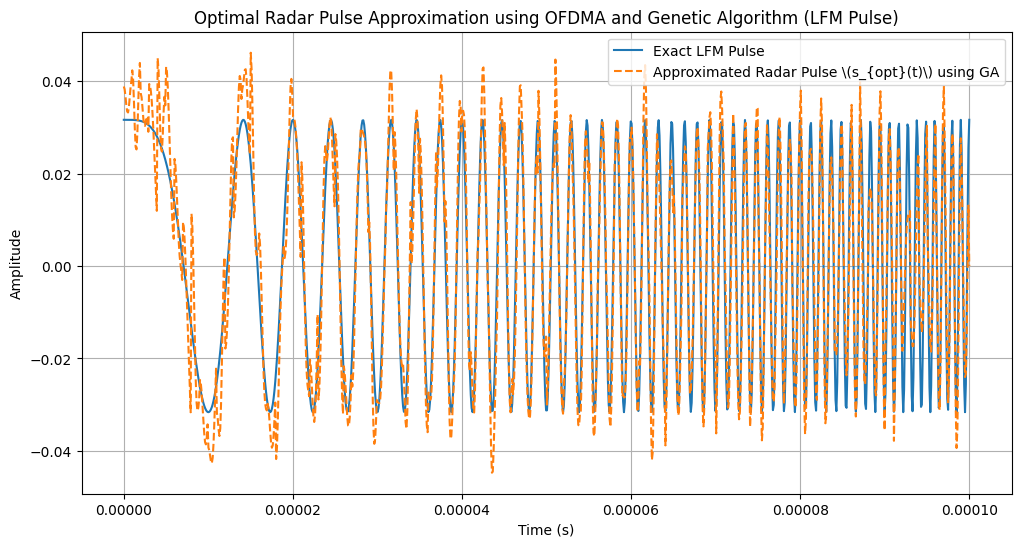

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from deap.tools import Statistics

# Define parameters
T = 1e-4       # Total duration of radar pulse (1e-4 seconds)
B = 1e6        # Bandwidth of radar pulse (1 MHz)
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies linearly spaced in bandwidth B

# High-resolution time vector for plotting
t = np.linspace(0, T, 1000)

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return np.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return np.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) * ((t >= l * Tb) & (t < (l + 1) * Tb))

# Construct g(t) as a matrix of OFDMA signals for all K users and L bit intervals
def construct_g_matrix():
    g_matrix = np.zeros((K, L), dtype=object)  # Storing functions instead of values
    for k in range(K):
        for l in range(L):
            g_matrix[k, l] = lambda t, k=k, l=l: ofdma_signal(t, frequencies[k], l)
    return g_matrix

# Construct the approximated radar pulse s_opt(t) using the optimal coefficients
def construct_s_opt(c_opt, t):
    s_opt = np.zeros(len(t), dtype=complex)
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Normalize a signal to have unit energy
def normalize_signal(signal):
    norm = np.sqrt(np.sum(np.abs(signal)**2))
    return signal / norm

# Normalize the LFM pulse once outside the GA loop
lfm_normalized = normalize_signal(lfm_pulse(t))

# Define fitness function for GA (Mean Squared Error between LFM and approximated pulse)
def fitness(individual):
    c_opt = np.array(individual)  # Convert individual to the correct coefficients
    s_opt = construct_s_opt(c_opt, t)  # Reconstruct the approximated radar pulse
    s_opt_normalized = normalize_signal(s_opt)  # Normalize the reconstructed pulse
    mse = np.mean(np.abs(lfm_normalized - s_opt_normalized)**2)  # Calculate MSE
    return mse,

# Set up Genetic Algorithm (DEAP library)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize MSE
creator.create("Individual", list, fitness=creator.FitnessMin)

# Initialize population (chromosomes)
population_size = 200  # Increased population size
population = [creator.Individual(np.random.rand(K * L)) for _ in range(population_size)]  # 200 individuals

# Define crossover, mutation, and selection methods
toolbox = base.Toolbox()
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)  # Refined mutation
toolbox.register("select", tools.selTournament, tournsize=5)  # Adjusted tournament size for selection
toolbox.register("evaluate", fitness)

# Create statistics object to track and print fitness during the evolution
stats = Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

# Run the genetic algorithm with custom statistics callback and increased generations
generations = 200  # Increased number of generations
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=generations,
                    stats=stats, halloffame=None, verbose=True)

# Extract the best solution
best_individual = tools.selBest(population, 1)[0]

# Reconstruct the approximated radar pulse with the best solution
c_opt_best = np.array(best_individual)
s_opt_best = construct_s_opt(c_opt_best, t)

# Normalize both signals to ensure energy matching
s_opt_best_normalized = normalize_signal(s_opt_best)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, np.real(lfm_normalized), label="Exact LFM Pulse")
plt.plot(t, np.real(s_opt_best_normalized), linestyle='--', label="Approximated Radar Pulse \(s_{opt}(t)\) using GA")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Optimal Radar Pulse Approximation using OFDMA and Genetic Algorithm (LFM Pulse)")
plt.legend()
plt.grid(True)
plt.show()


gen	nevals	avg     	min     
0  	200   	0.999143	0.995827
1  	153   	0.997504	0.993205
2  	153   	0.996013	0.992134
3  	138   	0.994805	0.991296
4  	156   	0.993519	0.99023 
5  	150   	0.992237	0.987683
6  	159   	0.990895	0.987017
7  	154   	0.989436	0.985492
8  	154   	0.988071	0.983916
9  	138   	0.986759	0.98333 
10 	151   	0.985377	0.981216
11 	167   	0.983991	0.980628
12 	159   	0.982796	0.979926
13 	155   	0.981909	0.979001
14 	144   	0.980798	0.977793
15 	155   	0.979871	0.97556 
16 	153   	0.97881 	0.97487 
17 	155   	0.977785	0.973497
18 	141   	0.976506	0.972918
19 	147   	0.975431	0.971478
20 	156   	0.974429	0.970881
21 	152   	0.973377	0.969498
22 	151   	0.972233	0.967794
23 	154   	0.971322	0.967794
24 	151   	0.970437	0.967781
25 	148   	0.969664	0.966838
26 	159   	0.968779	0.966221
27 	150   	0.967934	0.964974
28 	149   	0.967429	0.964195
29 	154   	0.966782	0.964083
30 	147   	0.965955	0.963617
31 	163   	0.965243	0.963551
32 	150   	0.964583	0.96214 
33 	159   	0.9

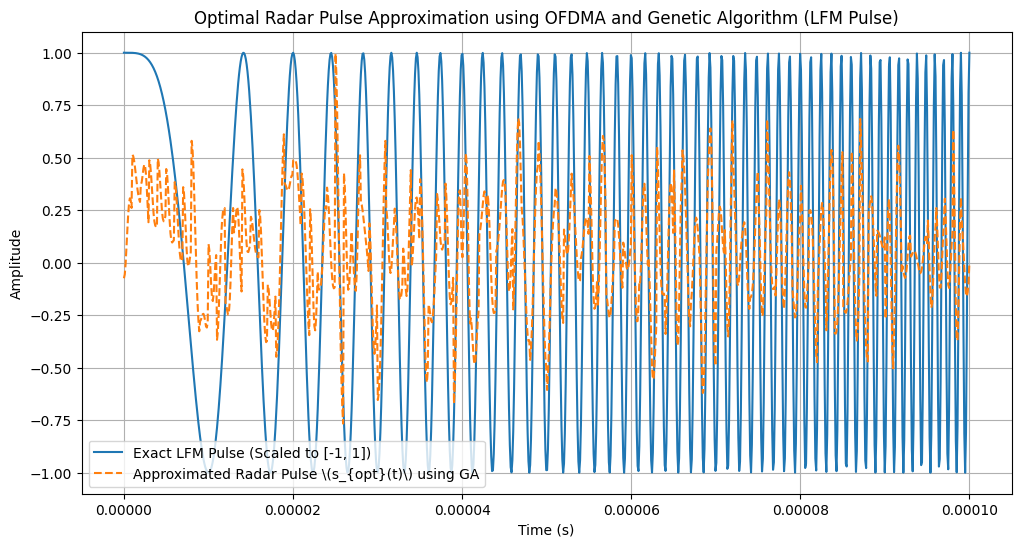

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from deap.tools import Statistics

# Define parameters
T = 1e-4       # Total duration of radar pulse (1e-4 seconds)
B = 1e6        # Bandwidth of radar pulse (1 MHz)
K = 5          # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
frequencies = np.linspace(0, B, K)  # Subcarrier frequencies linearly spaced in bandwidth B

# High-resolution time vector for plotting
t = np.linspace(0, T, 1000)

# Define LFM radar pulse
def lfm_pulse(t, T=T, B=B):
    """Linear Frequency Modulated (LFM) pulse."""
    return np.exp(1j * np.pi * B / T * t**2)

# Define OFDMA signals for each user k and bit interval l
def ofdma_signal(t, f_k, l):
    """OFDMA signal for user k in bit interval l."""
    return np.exp(1j * 2 * np.pi * f_k * (t - l * Tb)) * ((t >= l * Tb) & (t < (l + 1) * Tb))

# Construct g(t) as a matrix of OFDMA signals for all K users and L bit intervals
def construct_g_matrix():
    g_matrix = np.zeros((K, L), dtype=object)  # Storing functions instead of values
    for k in range(K):
        for l in range(L):
            g_matrix[k, l] = lambda t, k=k, l=l: ofdma_signal(t, frequencies[k], l)
    return g_matrix

# Construct the approximated radar pulse s_opt(t) using the optimal coefficients
def construct_s_opt(c_opt, t):
    s_opt = np.zeros(len(t), dtype=complex)
    for k in range(K):
        for l in range(L):
            s_opt += c_opt[k * L + l] * ofdma_signal(t, frequencies[k], l)
    return s_opt

# Normalize a signal to have unit energy
def normalize_signal(signal):
    norm = np.sqrt(np.sum(np.abs(signal)**2))
    return signal / norm

# Normalize the LFM pulse once outside the GA loop
lfm_normalized = normalize_signal(lfm_pulse(t))

# Scale the LFM pulse to the range [-1, 1]
lfm_scaled = lfm_normalized / np.max(np.abs(lfm_normalized))

# Define fitness function for GA (Mean Squared Error between LFM and approximated pulse)
def fitness(individual):
    c_opt = np.array(individual)  # Convert individual to the correct coefficients
    s_opt = construct_s_opt(c_opt, t)  # Reconstruct the approximated radar pulse
    s_opt_normalized = normalize_signal(s_opt)  # Normalize the reconstructed pulse
    mse = np.mean(np.abs(lfm_scaled - s_opt_normalized)**2)  # Calculate MSE
    return mse,

# Set up Genetic Algorithm (DEAP library)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize MSE
creator.create("Individual", list, fitness=creator.FitnessMin)

# Initialize population (chromosomes)
population_size = 200  # Increased population size
population = [creator.Individual(np.random.rand(K * L)) for _ in range(population_size)]  # 200 individuals

# Define crossover, mutation, and selection methods
toolbox = base.Toolbox()
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)  # Refined mutation
toolbox.register("select", tools.selTournament, tournsize=5)  # Adjusted tournament size for selection
toolbox.register("evaluate", fitness)

# Create statistics object to track and print fitness during the evolution
stats = Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

# Run the genetic algorithm with custom statistics callback and increased generations
generations = 50  # Increased number of generations
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=generations,
                    stats=stats, halloffame=None, verbose=True)

# Extract the best solution
best_individual = tools.selBest(population, 1)[0]

# Reconstruct the approximated radar pulse with the best solution
c_opt_best = np.array(best_individual)
s_opt_best = construct_s_opt(c_opt_best, t)

# Normalize both signals to ensure energy matching
s_opt_best_normalized = normalize_signal(s_opt_best)

# Scale the approximated radar pulse to the range [-1, +1]
s_opt_best_scaled = s_opt_best_normalized / np.max(np.abs(s_opt_best_normalized))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, np.real(lfm_scaled), label="Exact LFM Pulse (Scaled to [-1, 1])")
plt.plot(t, np.real(s_opt_best_scaled), linestyle='--', label="Approximated Radar Pulse \(s_{opt}(t)\) using GA")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Optimal Radar Pulse Approximation using OFDMA and Genetic Algorithm (LFM Pulse)")
plt.legend()
plt.grid(True)
plt.show()
